In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorboard as tb
import pickle
import datetime
import math
import json
import operator
import pickle
import sklearn
import scrapy
import codecs
import contrib
import string 
import nltk
import sys
import os
import re
import csv
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.probability import FreqDist
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.cluster  import k_means
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, Embedding, Dropout, Dense, LSTM
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.models import load_model
from keras.layers import Conv1D, Flatten, MaxPooling1D
#import wandb
#from wandb.keras import WandbCallback
#import wandb
import scipy
import openpyxl
import xlrd
from collections import Counter 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
import seaborn as sn
import keras.models
import pydot
import shutil
import string
import random

In [5]:
datas = pd.read_csv (r'D:/MSC/awsd.csv')
#print (datas)
dataset = datas.values.tolist()
print(dataset[0][0])

የሃረግ ሬሳና ጥሮ ከሃርግ ጋር የሚመሳሰሉ እጽዋት ናቸው


In [6]:
def per_process(data):
    panctuations='''።!)(-[]{};:'\,\<>./?@#$%^&*_~፤፣.-”“፠፥፦፧፨፡፡'''
    amharic_numbers=['፩','፫','፪','፬','፭','፮','፯','፰','፱''፲','፳','፴','፵','፶','፷','፸',
   '፹','፺','፻','፼','0','1','2','3','4','5','6','7','8','9']
    num_dataset=len(data)
    index=0
    while index<=(num_dataset-1):#inside this loop tokenization, stop-word removal and stemming functions wiill be implmentedsen=string_data[0][0]
        sen=data[index][0]
        sen_list=sen.split()
        #print(sen_list)
        def remove_panctuations():
            index_p=0
            size=len(sen_list)
            for word in sen_list:
                first_char=word[0]
                if first_char in panctuations and index_p<=(size-1):
                    temp=word[1:]
                    sen_list[index_p]=temp
                    #index_p=index_p+1
                elif index_p<=(size-1):
                    sen_list[index_p]=word
                    #index_p=index_p+1
                else:
                    break
                index_p=index_p+1
            index_p=0
            for x in sen_list:# for removing panctuations from the end of each token.
                if len(x)>1 and x[-1] in panctuations:
                    temp=x[:-1]
                    sen_list[index_p]=temp
                    #index_p=index_p+1
                else:
                    sen_list[index_p]=x
                    #index_p=index_p+1
                index_p=index_p+1
        remove_panctuations()
        #print("the list of the sentnces: ",sen_list)
        # here is a code which changes the list into text
        sen_text=""
        index_np=0
        size_np=len(sen_list)
        while index_np<=(size_np-1):
            sen_text=sen_text+" "+sen_list[index_np]
            index_np=index_np+1
        #print("the text of the sentences is: ", sen_text)
        normalized_sen=""
        #Below a lsit for Alphabet normalization is listed down. 
        ha_type_replacment=['ሀ','ሁ','ሂ','ሄ', 'ህ', 'ሆ']
        sa_type_replacment=['ሠ','ሡ','ሢ','ሣ','ሤ','ሥ','ሦ']
        a_type_replacement=['አ','ኡ','ኢ','ኤ','እ','ኦ ']
        wa_type_replacement=['ወ']
        te_type_replacement=['ፀ','ፁ','ፂ','ፃ','ፄ','ፅ','ፆ']
        ሀ_collection=['ሀ','ሃ','ሐ','ሓ','ኀ','ኃ']
        ሁ_collection=['ሁ','ሑ','ኁ']
        ሂ_collection=['ሂ','ሒ','ኂ']
        ሄ_collection=['ሄ','ሔ','ኄ']
        ህ_collection=['ህ','ሕ','ኅ']
        ሆ_collection=['ሆ','ሖ','ኆ']
        ሠ_collection=['ሠ','ሰ']
        ሡ_collection=['ሡ','ሱ']
        ሢ_collection=['ሢ','ሲ']
        ሣ_collection=['ሣ','ሳ']
        ሤ_collection=['ሤ','ሴ']
        ሥ_collection=['ሥ','ስ']
        ሦ_collection=['ሦ','ሶ']
        አ_collection=['አ','ኣ','ዐ','ዓ']
        ኡ_collection=['ኡ','ዑ']
        ኢ_collection=['ኢ','ዒ']
        ኤ_collection=['ኤ','ዔ']
        እ_collection=['እ','ዕ']
        ኦ_collection=['ኦ','ዖ']
        ወ_collection=['ዎ']
        ፀ_collection=['ጸ']
        ፁ_collection=['ጹ']
        ፂ_collection=['ጺ']
        ፃ_collection=['ጻ']
        ፄ_collection=['ጼ']
        ፅ_collection=['ጽ']
        ፆ_collection=['ጾ']
        normalized_sen=""
        size=len(sen_text)
        index_n=0
        #here is a loop for character normalization
        while index_n<=(size-1):
            char=sen_text[index_n]
            if char in ሀ_collection:
                char_replace=ha_type_replacment[0]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሁ_collection:
                char_replace=ha_type_replacment[1]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሂ_collection:
                char_replace=ha_type_replacment[2]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሄ_collection :
                char_replace=ha_type_replacment[3]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ህ_collection:
                char_replace=ha_type_replacment[4]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሆ_collection:
                char_replace=ha_type_replacment[5]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሠ_collection:
                char_replace=sa_type_replacment[0]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሡ_collection:
                char_replace=sa_type_replacment[1]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሢ_collection:
                char_replace=sa_type_replacment[2]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሣ_collection:
                char_replace=sa_type_replacment[3]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሤ_collection:
                char_replace=sa_type_replacment[4]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሥ_collection:
                char_replace=sa_type_replacment[5]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ሦ_collection:
                char_replace=sa_type_replacment[6]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in አ_collection:
                char_replace=a_type_replacement[0]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ኡ_collection:
                char_replace=a_type_replacement[1]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ኢ_collection:
                char_replace=a_type_replacement[2]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ኤ_collection:
                char_replace=a_type_replacement[3]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in እ_collection:
                char_replace=a_type_replacement[4]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ኦ_collection:
                char_replace=a_type_replacement[5]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ወ_collection:
                char_replace=wa_type_replacement[0]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፀ_collection:
                char_replace=te_type_replacement[0]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፁ_collection:
                char_replace=te_type_replacement[1]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፂ_collection:
                char_replace=te_type_replacement[2]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፃ_collection:
                char_replace=te_type_replacement[3]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፄ_collection:
                char_replace=te_type_replacement[4]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፅ_collection:
                char_replace=te_type_replacement[5]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif char in ፆ_collection:
                char_replace=te_type_replacement[6]
                normalized_sen=normalized_sen+char_replace
                index_n=index_n+1
            elif index_n<=(size-1):
                normalized_sen=normalized_sen+char
                index_n=index_n+1
            else:
                break   
        #print("the normalized sentences is: ", normalized_sen)
        sen_list2=normalized_sen.split() 
    #print(sen_list2)
        stopword=open("D:\MSC\Dataset\stop_word.txt",encoding='utf-8-sig',mode='r')
        stopwords=stopword.read()
        stopword_list=stopwords.split()
        sen_non_stopword=[]
        for terms in sen_list2:
            if terms not in stopword_list:
                sen_non_stopword.append(terms)
        prefix=open("D:\MSC\Dataset\prefix_list.txt",encoding='utf-8-sig',mode='r')
        prefixs=prefix.read()
        prefix_list=prefixs.split() # prefix list is prepared know.
        #print(" List of prefixs ", prefix_list)
        suffix=open("D:\MSC\Dataset\suffix_list.txt",encoding='utf-8-sig',mode='r')
        suffixs=suffix.read()
        suffix_list=suffixs.split() # Here suffix list is already prepared.
        #prefix removal started Here.
        stem=sen_non_stopword
        index_st=0
        for words in stem:
            size_w=len(words)
            index_pr=0
            for prefix in prefix_list: 
                size_pr=len(prefix)
                if words[0:size_pr] in prefix_list and (size_w-size_pr>2):
                    temp=words[size_pr:size_w]
                    stem[index_st]=temp
                    break
                index_pr=index_pr+1
                if index_pr>=(len(prefix_list)):
                    break
            index_st=index_st+1
            if index_st>=(len(stem)):
                break
        #prefix removal ends Here.
        #suffix removal starts Here.
        index_st=0
        for words in stem:
            size_w=len(words)
            index_su=0
            for suffix in suffix_list:
                size_su=len(suffix)
                r=size_w-size_su
                if words[r:] in suffix_list and (size_w-size_su>2):
                    temp=words[:r]
                    stem[index_st]=temp
                    break
                index_su=index_su+1
                if index_su>=(len(suffix_list)):
                    break
            index_st=index_st+1
            if index_su>=(len(stem)):
                break
        stemmed_text=""
        index_stemmed=0
        size_stemmed=len(stem)
        while index_stemmed<=(size_stemmed-1):
            stemmed_text=stemmed_text+" "+sen_non_stopword[index_stemmed]
            index_stemmed=index_stemmed+1
        #print(sen_non_stopword)
        data[index][0]=stemmed_text
        index=index+1
    return data
processed=per_process(dataset)
#print(processed)
df=pd.DataFrame(dataset) #convert list back to pandas dataframe
df.shape
#df_col_len = int(train_data['new'].str.encode(encoding='utf-8').str.len().max())

df[0]
train_data = df.rename(columns={0: 'sentences', 1: 'label', 2: 'relation'})
train_data.head()

AttributeError: 'float' object has no attribute 'split'

In [4]:
data_t = pd.read_csv(r'D:/MSC/test_data.csv')
datam = data_t.values.tolist()
print(datam[0][0])
processed=per_process(datam)
#print(processed)
df=pd.DataFrame(datam) #convert list back to pandas dataframe
df.shape
#df_col_len = int(train_data['new'].str.encode(encoding='utf-8').str.len().max())

df[0]
test_data = df.rename(columns={0: 'sentences', 1: 'label', 2: 'relation'})
test_data.head()

ሰፋ የሚለው ተንቦረቀቀቅ ከሚለው ቃል ጋር ይመሳሰላል።


,sentences,label,relation
0,ሠፋ ሚለው ተንቦረቀቀቅ ከሚለው ቃል መሣሠላል,0,Synonym
1,የብዙ ወንዞች ገባር ሆነው አባይ አመቱ ጠርዙ እየሠፋ,1,Hypernomy
2,ጠርዙ ሠፋው አባይ የብዙ ግልገል ወንዞች ጥምር,2,Hyponomy
3,ልብሡ ጫፍ በመርፌ ሠፋች,3,Meronomy
4,በመርፌ ሠፋችው ልብሡን ጫፍ,4,Holonomy


In [5]:
train_data['sentences'].apply(lambda x:x.lower())
#train_data['sentences'] = data['sentences'].apply(lambda x:re.sub('[A-Za-z0-9\s]','',x)
train_data['sentences'].head()                                         

0         ሀረግ ሬሣና ጥሮ ከሀርግ ሚመሣሠሉ እፅዋት
1           እፅዋ በዛፎ ሚጠመጠሙ ሀረጎችንም ይዛል
2                      ሀረግ እፅዋት አይነት
3     አረፍተ ሁለትና ከዛ በላይ ሀርጎችን ሊይዝ ችላል
4                       ሀረግ አረፍተ ክፍል
Name: sentences, dtype: object

In [6]:
tokenizer = Tokenizer(num_words = 500000, split = " ")
tokenizer.fit_on_texts(train_data['sentences'].values)
x = tokenizer.texts_to_sequences(train_data['sentences'].values)
x = pad_sequences(x)   
x[:5]                    

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  366, 1750,  841, 1751, 1752,   56],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  842, 1753, 1754, 1755,  367],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  366,   56,   36],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [7]:
num_words=500000
tokenizer = Tokenizer(num_words= num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['sentences'].tolist())
print(tokenizer.texts_to_sequences(train_data))
#print(str(tokenizer.texts_to_sequences(['Dereje how are you'])))

[[1], [1], [1]]


In [8]:
y = pd.get_dummies(train_data['label'].values)

In [9]:
train_data.dropna(axis = 0, how ='any', inplace = True)
train_data['Num_words_sentences'] = train_data['sentences'].apply(lambda x:len(str(x).split()))
mask = train_data['Num_words_sentences']>2
train_data = train_data[mask]
print('++++++++++++++++Train data+++++++++++')
print(train_data['sentences'])
print(len(train_data))
print('========================') 
max_train_sentence_length = train_data['Num_words_sentences'].max()

++++++++++++++++Train data+++++++++++
0                              ሀረግ ሬሣና ጥሮ ከሀርግ ሚመሣሠሉ እፅዋት
1                                እፅዋ በዛፎ ሚጠመጠሙ ሀረጎችንም ይዛል
2                                           ሀረግ እፅዋት አይነት
3                          አረፍተ ሁለትና ከዛ በላይ ሀርጎችን ሊይዝ ችላል
4                                            ሀረግ አረፍተ ክፍል
                              ...                        
1527     ያለው ቻይና ኢምባሢ ቃል አቀባይ ደተናገረው እንጉዳይን ብክለት ማቆም ቤ...
1528                       ችግሩ «በአጭር ጊዜ» ፍትሄ ደሚያገኝ ተንብዮአል
1529     ማታ ሤይንት ሉዊሥ መሪወች ክርክር ሊካሄድ ባለበት ተወዳዳሪ ተመራጮች ሚ...
1530     ባንድ በረበት ሢታይ ተሻለ ወንዝ ጥያቄው--- ቀድሞው ይዘት ዲመለሥ ደረ...
1531                            ኤንቢሢ ብሄራዊ ዜና አጠናቃሪ ጂም አቪላ
Name: sentences, Length: 1502, dtype: object
1502


In [10]:
#test_data = pd.read_csv(r'C:\Users/HANU-TECH/Desktop/Data/test_data.csv')
#dataset = datas.values.tolist()
#print(dataset[0][0])
test_data.dropna(axis =0, how ='any', inplace = True)
test_data['Num_words_text'] = test_data['sentences'].apply(lambda x:len(str(x).split()))
mask = test_data['Num_words_text']>2
test_data = test_data[mask]
print('++++++++++++++++Test data+++++++++++')
print(test_data['label'])
print(len(test_data))
print('========================')
max_test_sentence_length = test_data['Num_words_text'].max()

++++++++++++++++Test data+++++++++++
0     0
1     1
2     2
3     3
4     4
     ..
87    3
88    4
89    5
90    6
91    7
Name: label, Length: 91, dtype: int64
91


In [11]:
X = np.reshape(x, x.shape+(1,))
Y = X.reshape((X.shape[0], X.shape[1], 1))
X.shape
Y.shape

(1532, 40, 1)

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train_data['sentences'].tolist(),\
                                                     train_data['label'].tolist(),\
                                                     test_size = 0.1,\
                                                     stratify = train_data['label'].tolist(),\
                                                     random_state = 0)

In [13]:
print('Train data len:'+str(len(X_train)))
print('Class distribution:'+str(Counter(Y_train)))
print('valid data len:'+str(len(X_valid)))
print('Class distribution:'+str(Counter(Y_train)))

Train data len:1351
Class distribution:Counter({8.0: 351, 0.0: 129, 2.0: 128, 6.0: 128, 1.0: 128, 7.0: 127, 4.0: 125, 3.0: 125, 5.0: 110})
valid data len:151
Class distribution:Counter({8.0: 351, 0.0: 129, 2.0: 128, 6.0: 128, 1.0: 128, 7.0: 127, 4.0: 125, 3.0: 125, 5.0: 110})


In [14]:
X_train = np.array(tokenizer.texts_to_sequences(X_train))
X_valid = np.array(tokenizer.texts_to_sequences(X_valid))
X_test = np.array(tokenizer.texts_to_sequences(test_data['sentences'].tolist()) )

D:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
D:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
D:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [15]:
X_train = pad_sequences(X_train, padding = 'post', maxlen =40)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen =40)
X_test = pad_sequences(X_test, padding = 'post', maxlen =40)

In [16]:
le = LabelEncoder()
train_labels = le.fit_transform(Y_train)
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))
#print valid_labels
valid_labels = le.transform(Y_valid)
valid_labels = np.asarray(tf.keras.utils.to_categorical(valid_labels))
test_labels = le.transform(test_data['label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_labels))
print(Y_train[:10])
train_label = le.fit_transform(Y_train)
print("Text to number")
print(train_labels[:10])
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

[4.0, 8.0, 0.0, 3.0, 2.0, 6.0, 0.0, 7.0, 8.0, 1.0]
Text to number
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Number to category
[[[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  

In [18]:
#CNN Model Building 
max_features = 800000
embedding_die = 32
sequence_length = 40
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_die, input_length = 40,\
                                   embeddings_regularizer = regularizers.l2(0.0005)))
model.add(tf.keras.layers.Conv1D(32,3, activation = 'relu',\
                                kernel_regularizer = regularizers.l2(0.0005),\
                                bias_regularizer = regularizers.l2(0.0005)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.49))
model.add(tf.keras.layers.Dense(9, activation = 'softmax',\
                               kernel_regularizer = regularizers.l2(0.001),\
                               bias_regularizer = regularizers.l2(0.001)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 32)            25600032  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 38, 32)            3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 25,603,433
Trainable params: 25,603,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
#model Configuration 
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer ='adam' , metrics = ['CategoricalAccuracy'])

In [20]:
epochs = 10
history = model.fit(train_ds.shuffle(2000).batch(64),
                   epochs = epochs,
                   validation_data = valid_ds.batch(64),
                   verbose =1)

Epoch 1/10


D:\anaconda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\backend.py:4943: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


22/22 [==============================] - 30s 943ms/step - loss: 10.1904 - categorical_accuracy: 0.2276 - val_loss: 4.4574 - val_categorical_accuracy: 0.2583
Epoch 2/10
22/22 [==============================] - 13s 603ms/step - loss: 3.6830 - categorical_accuracy: 0.2527 - val_loss: 2.4102 - val_categorical_accuracy: 0.2583
Epoch 3/10
22/22 [==============================] - 12s 548ms/step - loss: 2.2744 - categorical_accuracy: 0.2467 - val_loss: 2.1461 - val_categorical_accuracy: 0.2583
Epoch 4/10
22/22 [==============================] - 13s 591ms/step - loss: 2.0709 - categorical_accuracy: 0.2580 - val_loss: 2.0974 - val_categorical_accuracy: 0.2583
Epoch 5/10
22/22 [==============================] - 12s 564ms/step - loss: 1.9751 - categorical_accuracy: 0.2818 - val_loss: 2.0466 - val_categorical_accuracy: 0.2583
Epoch 6/10
22/22 [==============================] - 11s 522ms/step - loss: 1.8937 - categorical_accuracy: 0.2982 - val_loss: 1.9732 - val_categorical_accuracy: 0.2781
Epoch 7/

In [21]:
checkpoint_path = 'C:/Users/HANU-TECH/Desktop/progress-report/.ipynb_checkpoints/dereje-checkpoint.ipynb'
checkpoint_dir =os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only = True, verbose = 1)

In [22]:
model.save('CNN3.h5')

In [23]:
new_model = load_model('CNN3.h5')

In [24]:
rounded_predictions = model.predict_classes(X_test)
rounded_predictions[1]

D:\anaconda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [25]:
rounded_labels= np.argmax(model.predict(x), axis=-1)
rounded_labels[1]

6

In [26]:
rounded_labels= np.argmax(model.predict(x), axis=-1)
rounded_labels[1]

6

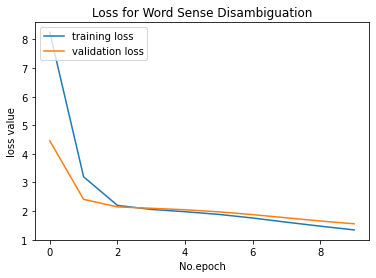

In [36]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Loss for Word Sense Disambiguation')
plt.ylabel('loss value')
plt.xlabel('No.epoch')
plt.legend(loc = "upper left")
plt.show()

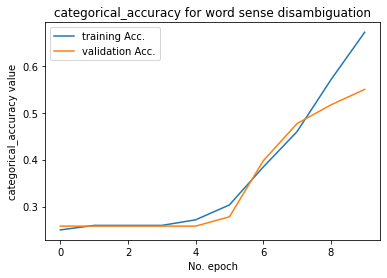

In [35]:
plt.plot(history.history['categorical_accuracy'], label = 'training Acc.')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation Acc.')
plt.title('categorical_accuracy for word sense disambiguation')
plt.ylabel('categorical_accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc = "upper left")
plt.show()

In [29]:
print("Evaluate on test data")
results = new_model.evaluate(X_test, test_labels)
print("test loss, test acc:", results)
print("Generate pridictions for all samples")
rounded_predictions = new_model.predict(X_test)
predict_results = rounded_predictions.argmax(axis = 1)

Evaluate on test data
3/3 [==============================] - 1s 130ms/step - loss: 1.2360 - categorical_accuracy: 0.8022
test loss, test acc: [1.235954999923706, 0.8021978139877319]
Generate pridictions for all samples


In [30]:
print(predict_results)

[0 1 3 3 8 5 6 7 0 8 8 8 8 5 6 7 0 1 2 8 8 5 6 7 0 1 8 3 8 5 6 7 0 8 8 8 8
 8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 6 1 2 3 8 5 6 7 0 1 2 3 1 5 6 7 0 8 2 3 8 6
 7 0 1 2 3 8 5 6 7 0 1 2 3 8 5 6 7]


In [31]:
test_data['predict_label']= predict_results
test_data['predict_label']= np.where((test_data.predict_label==0), 0,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==1), 1,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==2), 2,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==3), 3,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==4), 4,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==5), 5,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==6), 6,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==7), 7,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==8), 8,test_data.predict_label)
#print(test_data.predict_results)
labels = [0,1,2,3,4,5,6,7,8]
print(classification_report(test_data['label'].tolist(),test_data['predict_label'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.88      0.78      0.82         9
           2       1.00      0.67      0.80         9
           3       0.88      0.78      0.82         9
           4       0.00      0.00      0.00         9
           5       1.00      1.00      1.00         8
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00         9
           8       0.56      0.95      0.71        19

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.76      0.80      0.77        91



D:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


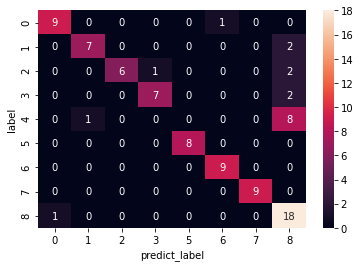

In [32]:
data = {'label':    [0, 1, 2, 3, 4, 5, 6, 7, 8],
        'predict_label': [0, 1, 7, 3, 4, 5, 6, 7, 8]
        }

df = pd.DataFrame(data, columns=['label','predict_label'])
confusion_matrix = pd.crosstab(test_data['label'], test_data['predict_label'], rownames=['label'], colnames=['predict_label'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()